# AVIATION ACCIDENTS

## Business Understanding 

Business Problem: My company is expanding into the aviation industry but lacks insights into aircraft safety risks. This analysis identifies the lowest-risk aircraft models for commercial and private use.

### Problem Statement

The aviation industry may be able to improve safety measures by analyzing accident data to identify patterns in aircraft damage and fatality rates. Doing so will allow airlines, manufacturers, and regulatory agencies to better understand risk factors and implement strategies to enhance aviation safety. Using aircraft accident data, I will examine key trends to determine which aircraft models demonstrate strong safety records and provide actionable insights for improving aviation safety standards.

### Business Objectives 
1.Which aircraft models have the highest fatality rates?

2.Try and find the leading cause of aviation accidents?

3.Trends in aviation fatalities over the years?

4.Recomend actions to help mitigate/prevent aviation accidents and incedents?

## Data Understanding

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [99]:
df = pd.read_csv("aviation-accident-data-2023-05-16.csv")
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [101]:
df.describe()

,date,type,registration,operator,fatalities,location,country,cat,year
count,23967,23967,22419,23963,20029,23019,23967,23967,23967
unique,15079,3201,21962,6017,369,14608,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1916,13,2604,10713,272,4377,17424,1505


In [102]:
df.shape

(23967, 9)

## Data Preparation

#### Data Cleaning

In [103]:
# check for duplicated values 
df.duplicated().value_counts()


False    23852
True       115
dtype: int64

In [104]:
 #View duplicates 
df[df.duplicated()].head(15)

,date,type,registration,operator,fatalities,location,country,cat,year
542,13-APR-1940,Junkers Ju-52/3m,NaN,German AF,NaN,"Gangsoya, Sogn o...",Norway,A1,1940
560,29-APR-1940,Junkers Ju-52/3m,NaN,German AF,0,Oslo-Fornebu Air...,Norway,A1,1940
568,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,Waalhaven,Netherlands,A1,1940
577,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
579,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,Waalhaven,Netherlands,A1,1940
580,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
581,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
582,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
584,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,Waalhaven,Netherlands,A1,1940
585,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940


In [105]:
# removing  duplicated values 
df = df.drop_duplicates()

In [106]:
# verify that they have been removed

df.duplicated().value_counts()

False    23852
dtype: int64

In [107]:
# gives the columns names in the dataset
df.columns

Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year'],
      dtype='object')

### Dealing with missing values

#### Detecting Null Values

In [108]:
# detecting null  values 
#isnull

df.isna().sum()

date               0
type               0
registration    1434
operator           4
fatalities      3833
location         932
country            0
cat                0
year               0
dtype: int64

### Handling missing values

In [109]:
df["operator"] = df["operator"].fillna("Unknown")
df.isna().sum()


date               0
type               0
registration    1434
operator           0
fatalities      3833
location         932
country            0
cat                0
year               0
dtype: int64

In [110]:
df["fatalities"] = df["fatalities"].fillna("no fatalities")
df.isna().sum()

date               0
type               0
registration    1434
operator           0
fatalities         0
location         932
country            0
cat                0
year               0
dtype: int64

In [111]:
df["location"] = df["operator"].fillna("unknown location")
df.isna().sum()

date               0
type               0
registration    1434
operator           0
fatalities         0
location           0
country            0
cat                0
year               0
dtype: int64

In [112]:

df["registration"] = df["registration"].fillna("no registeration")
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

## Data Analysis

 Objective 1 : Which aircraft models have the highest fatality rates?

In [113]:
df["fatalities"] = pd.to_numeric(df["fatalities"], errors="coerce")

In [114]:
# Using groupby
top_fatal_models = df.groupby("type")["fatalities"].sum().sort_values(ascending=False).head(10)

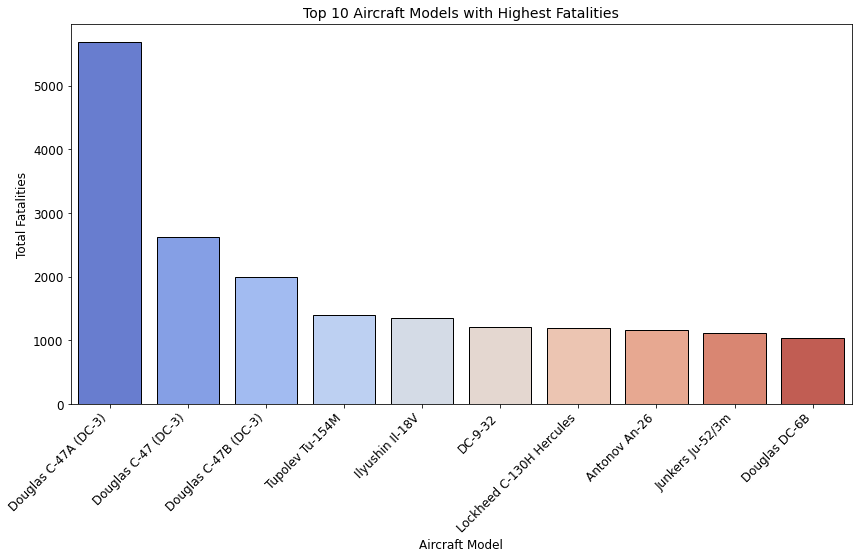

In [115]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_fatal_models.index, y=top_fatal_models.values, palette="coolwarm", edgecolor="black")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 10 Aircraft Models with Highest Fatalities", fontsize=14)
plt.xlabel("Aircraft Model", fontsize=12)
plt.ylabel("Total Fatalities", fontsize=12)
plt.show()

In [116]:
# Calcuate fatality rate per model
df["fatalities"] = pd.to_numeric(df["fatalities"], errors="coerce")
accident_counts = df.groupby("type")["fatalities"].count()
# Sum total fatalities per model
fatality_sums = df.groupby("type")["fatalities"].sum()
fatality_rate = (fatality_sums / accident_counts).sort_values(ascending=False).head(10)

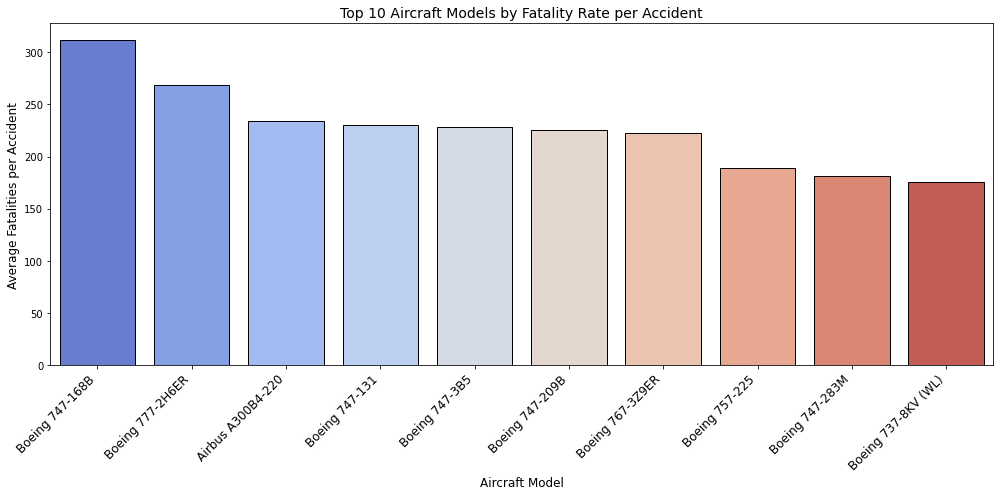

In [122]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=fatality_rate.index, y=fatality_rate.values, palette="coolwarm", edgecolor="black")
plt.title("Top 10 Aircraft Models by Fatality Rate per Accident", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Aircraft Model", fontsize=12)
plt.ylabel("Average Fatalities per Accident", fontsize=12)
plt.tight_layout()
plt.show()

Boeing 747-168B has the highest fatalities (approximately 320 cases) -has the highest fatarlity per accident due to it's large size.Boeing 747-168B has one largest seating capacity amoung aircraft models.

Douglas C47-A also has significant fatalities (is an older generation model tending to have higher accident rates due to outdated systems)